<a href="https://colab.research.google.com/github/maxbshaw17/Date_Science_Final/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Whether a University Student Will Drop Out Or Not

## The Machine Learning Aspect of Max Bradshaw and Jake Dorick's Data Science Final Project

In [1]:
from ast import increment_lineno
# Import pandas and the dropout dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving dropout_dataset.csv to dropout_dataset.csv


In [2]:
import io
df = io.BytesIO(uploaded['dropout_dataset.csv'])

In [3]:
df = pd.read_csv('dropout_dataset.csv')

In [4]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [5]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

## Automated Exploratory Data Analysis

In [6]:
# Install the sweetviz package for automated exploratory data analysis
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 15.1 MB/s eta 0:00:00


In [7]:
# Create the automated EDA report as a html file in user's browser
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('automated_EDA.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report automated_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Supervised Machine Learning — Decision Trees

In [8]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Drop the answer (the Target column in this dataset's case)
X = df.drop('Target', axis = 1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=500)

In [9]:
# Train the decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = dtree.predict(X_test)
# Print the classification report of the decision tree model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     Dropout       0.66      0.66      0.66       275
    Enrolled       0.40      0.44      0.42       168
    Graduate       0.79      0.75      0.77       442

    accuracy                           0.67       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.67      0.67      0.67       885



In [11]:
# Let's see the confusion matrix now...
print(confusion_matrix(y_test,predictions))

[[182  54  39]
 [ 42  74  52]
 [ 50  59 333]]


Not great...

### Supervised Machine Learning — Artificial Neural Network

In [12]:
# Resetting these variables to avoid any mixups that may occur in previous code
X = df.drop('Target', axis = 1)
y = df['Target']

In [13]:
# Convert the target labels from words to numbers using label_encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Scaling the columns

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Import the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
classifier = Sequential()

### Creating the Layers

In [18]:
# First hidden layer
classifier.add(Dense(activation="relu", input_dim=34, units=6, kernel_initializer="uniform"))
# Second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [19]:
# Output layer
# SoftMax function will be used since the dependent variable has more than 2 categories
# The Target column is either Dropout, Graduate, or Enrolled (3 categories)
classifier.add(Dense(activation="softmax", units=3, kernel_initializer="uniform"))

In [20]:
# Compiling
# Used categorical crossentropy (rather than binary crossentropy) since there are three categories of analysis
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [21]:
# Fitting
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
354/354 [==============================] - 4s 5ms/step - loss: 0.8631 - accuracy: 0.6383
Epoch 2/10
354/354 [==============================] - 2s 5ms/step - loss: 0.6419 - accuracy: 0.7341
Epoch 3/10
354/354 [==============================] - 1s 4ms/step - loss: 0.6135 - accuracy: 0.7448
Epoch 4/10
354/354 [==============================] - 2s 5ms/step - loss: 0.6010 - accuracy: 0.7513
Epoch 5/10
354/354 [==============================] - 3s 7ms/step - loss: 0.5926 - accuracy: 0.7536
Epoch 6/10
354/354 [==============================] - 2s 7ms/step - loss: 0.5865 - accuracy: 0.7516
Epoch 7/10
354/354 [==============================] - 2s 5ms/step - loss: 0.5817 - accuracy: 0.7573
Epoch 8/10
354/354 [==============================] - 2s 5ms/step - loss: 0.5770 - accuracy: 0.7564
Epoch 9/10
354/354 [==============================] - 2s 4ms/step - loss: 0.5734 - accuracy: 0.7607
Epoch 10/10
354/354 [==============================] - 1s 4ms/step - loss: 0.5705 - accuracy: 0.7547

In [22]:
# Predicting the test results
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

28/28 [==============================] - 0s 5ms/step


In [23]:
# Have to change the values back into words
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

In [24]:
# Create the confusion matrix
cm = confusion_matrix(y_test_original, y_pred_original)
print(cm)

[[226  23  35]
 [ 44  47  60]
 [ 10  21 419]]


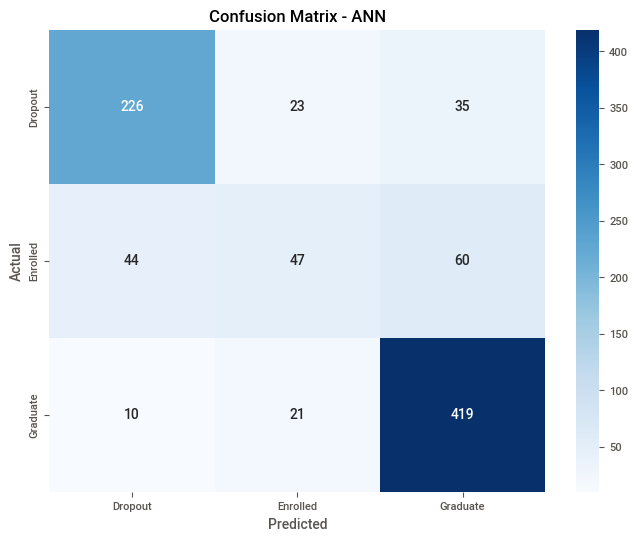

In [25]:
# Visual representation of the confusion matrix using seaborn
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN')
plt.show()

In [26]:
# Calculate accuracy using sklearn.metric's function
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_original, y_pred_original)
print(accuracy)

0.7819209039548023


Better.

## Redoing the Artificial Neural Network **Without** the Enrolled Category

In [27]:
df2 = df[df['Target'] != 'Enrolled']
df2

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [28]:
X = df2.drop('Target', axis = 1)
y = df2['Target']

In [29]:
# Back to numerical representation
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
classifier = Sequential()

In [33]:
# First hidden layer
classifier.add(Dense(activation="relu", input_dim=34, units=6, kernel_initializer="uniform"))
# Second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [34]:
# Two units instead of three now
classifier.add(Dense(activation="softmax", units=2, kernel_initializer="uniform"))

In [35]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Instead of Normally Fitting the Classifier, Let's Make it into a Graph

291/291 [==============================] - 1s 2ms/step - loss: 0.2155 - accuracy: 0.9229


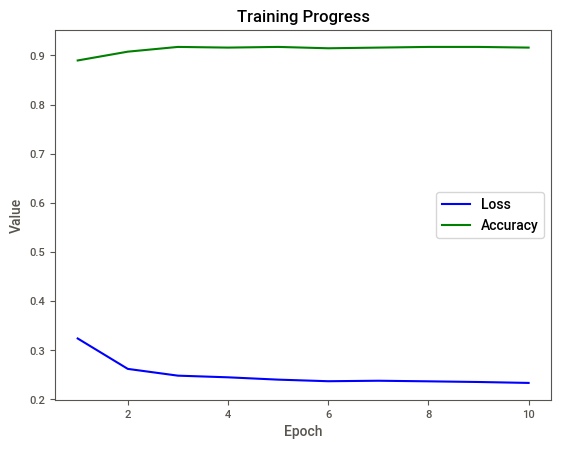

In [36]:
# The function update_graph will update the graph with each additional epoch
def update_graph(epoch, losses, accuracies):
    plt.cla()  # Clear the current axes
    plt.plot(range(1, epoch + 1), losses, label='Loss', color='blue')
    plt.plot(range(1, epoch + 1), accuracies, label='Accuracy', color='green')
    plt.title('Training Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()

# Your actual training code with a loop for each epoch
losses = []
accuracies = []

for epoch in range(1, 11):  # Assuming 10 epochs as in your code
    # Your actual training code for each epoch
    classifier.fit(X_train, y_train, batch_size=10, epochs=1)

    # Obtain the loss and accuracy for the current epoch
    loss_value, accuracy_value = classifier.evaluate(X_test, y_test, verbose=0)

    # Append values to the lists
    losses.append(loss_value)
    accuracies.append(accuracy_value)

    # Update the graph
    update_graph(epoch, losses, accuracies)

# Display the  graph
plt.show()

In [37]:
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

23/23 [==============================] - 0s 1ms/step


In [38]:
# Back to words
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

In [39]:
cm = confusion_matrix(y_test_original, y_pred_original)
print(cm)

[[250  46]
 [ 15 415]]


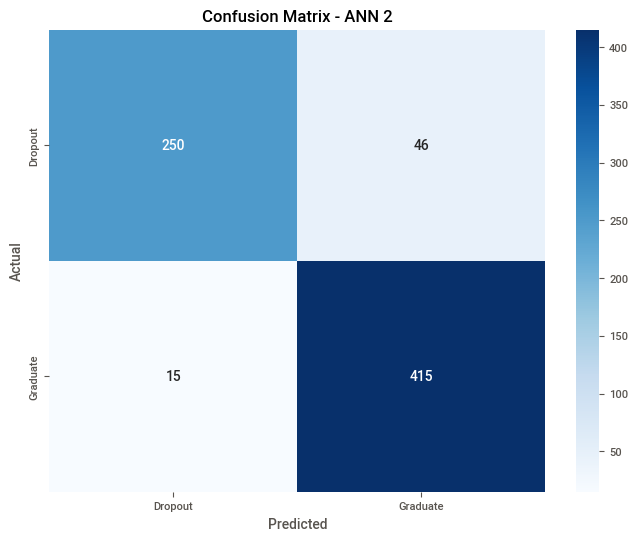

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN 2')
plt.show()

In [41]:
accuracy = accuracy_score(y_test_original, y_pred_original)
print(accuracy)

0.9159779614325069


Wow!

## Visualize

In [42]:
# Install visualization packages
!pip install ann_visualizer
!pip install graphviz
!pip install visualkeras

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=e3d88e96bfa08ada7fb08476c8cef95561a393be8d7c0281a7eb81bc726c23e4
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 9.8 MB/s eta 0:00:00


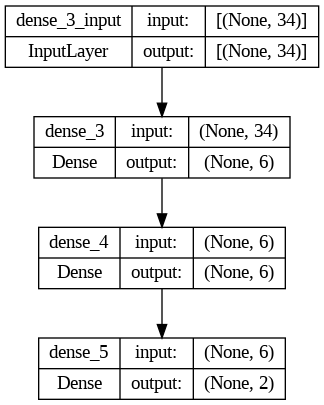

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, to_file='network.png', show_shapes=True, show_layer_names=True)

# New Machine Learning Technique — Hidden Markov Model — Generative Model

In [44]:
# Install and import the package hmm(Hidden Markov Model)learn
!pip install hmmlearn
from hmmlearn import hmm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.1 MB/s eta 0:00:00


In [45]:
# Reset these variables one more time (Using the dataframe that only consists of graduates and dropouts)
X = df2.drop('Target', axis=1)
y = df2['Target']

In [46]:
# Back to numbers (again)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
# Define and train the Hidden Markov Model
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100, algorithm = 'map')
model.fit(X_train)

GaussianHMM(algorithm='map', covariance_type='full', n_components=2, n_iter=100)

In [49]:
y_pred = model.predict(X_test)
# Back to words (again)
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

In [50]:
accuracy = accuracy_score(y_test_original, y_pred_original)
print(accuracy)

0.40082644628099173


In [51]:
cm = confusion_matrix(y_test_original, y_pred_original)
print(cm)

[[172 124]
 [311 119]]


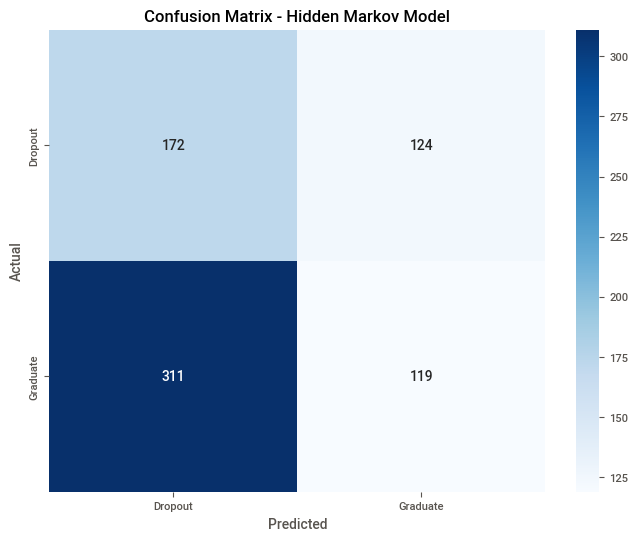

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Hidden Markov Model')
plt.show()

Oh boy...

### The dataframe is not a system that changes between states within specific probabilities; the use of a Hidden Markov Model is likely not useful...

#